# KMeans dengan Numpy

Reference : 

https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/

**Step 1**

Inisialisasi jumlah k cluster

**Step 2**

Pilih K secara acak untuk nilai centroid

**Step 3**

Hitung jarak untuk setiap centroid

**Step 4**

Klasifikasi hasil dari centroid cluster

**Step 5**

Ambil nilai mean pada setiap class untuk membuat centroid baru

**Step 5**

Mengulangi langkah 3-5 hingga convegence

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [0]:
# Membuat variabel data array matriks dengan numpy
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

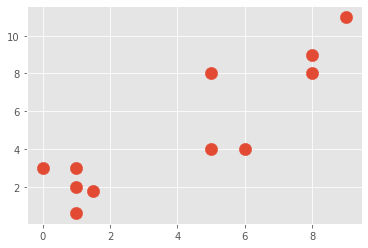

In [0]:
plt.scatter(X[:,0], X[:,1], s=150) # s=150 -> digunakan untuk ukuran point pada titik value
plt.show()

In [0]:
colors = 10*["g","r","c","b","k"]

In [0]:
class K_Means:
    # fungsi untuk inisialisasi jumlah k, tolerance convergence, dan maximum iterasi
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    # fungsi untuk training data
    def fit(self,data):
        self.centroids = {} # variabel untuk menampung data centroid dengan inisialisasi awal object kosong.

        # fungsi perulangan untuk setiap k
        for i in range(self.k):
            self.centroids[i] = data[i] # setiap item data pada X akan diinisialisasi pada setiap item centroid

        # perualangan untuk ietrasi
        for i in range(self.max_iter):
            self.classifications = {} # variabel untuk klasifikasi

            for i in range(self.k):
                self.classifications[i] = [] # inisialisasi variabel untuk setiap item klasifikasi adalah array kosong

            # perulangan untuk menghitung jarak semua data dengan centroid yang terbentuk
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            # perulangan untuk membentuk klasifikasi centroid
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            # Mengambil nilai centroid terakhir dan lakukan perhitungan untuk mencari nilai centroid baru 
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    # fungsi untuk melakukan prediksi data
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [0]:
# uji training dengan data X
clf = K_Means()
clf.fit(X)

484.7222222222223
13.0
52.10727969348656


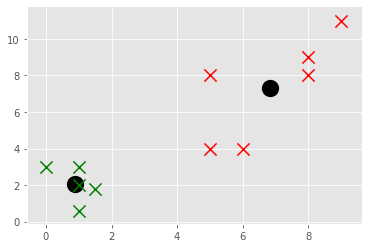

In [0]:
# Visualisasikan clustering yang terbentuk
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)


plt.show()

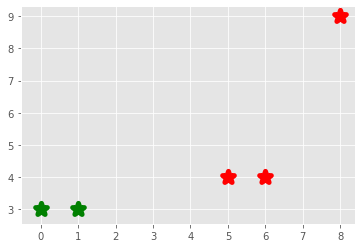

In [0]:
# buat avariabel data array baru dan lakukan prediksi data yang baru
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# KMeans dengan Data Pengunjung Mall

Reference :

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm

In [0]:
# Mengimpor dataset
dataset = pd.read_csv('./sample_data/Pengunjung_mall.csv')
dataset.describe()

,IDPelanggan,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
# melakukan slicing, dari dataset yang dimiliki. Kita hanya memerlukan kolom ke 3 (pendapatan) dan 4 (rating pengeluaran) saja
X = dataset.iloc[:, [3, 4]].values

In [0]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Hasil dari matriks diatas adalah :

(200,2) -> 200 baris, dan 2 kolom

In [0]:
# insisalisasi nili K, maximum iterasi dan centroid
K=5
m=200
Centroids=np.array([]).reshape(2,0)

**Step 1**

inisialisasi centroid secara acak dari dataset.

perhitungan centroid menggunakan

`N x K`

Dimana untuk setiap kolom akan menjadi centroid untuk setiap cluster.



In [0]:
#step 1
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

**Step 2**

Melakukan perhitungan untuk mencari jarak `euclidean` dari centroid terdekat.

Kita akan mencari euclidean untuk setiap point dengan

`M x K`

Kemudian kita lakukan grouping untuk data point pada cluster yang terbentuk.

In [0]:
#step2
num_iter=100
Output=defaultdict()
Output={}
for n in range(num_iter):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    Output=Y

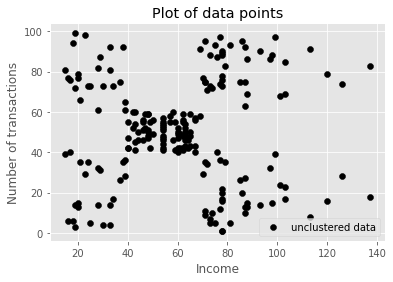

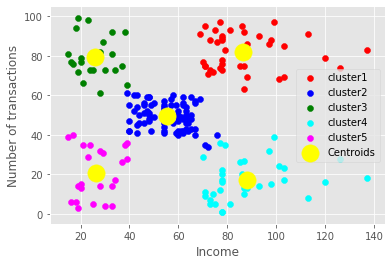

In [0]:
# Visualisasi hasil
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()